In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import glob
import geopandas
import numpy as np
import cartopy.feature as cfeature
from cartopy import crs as ccrs
from shapely import geometry
from datetime import datetime

In [2]:
hs_df = geopandas.GeoDataFrame()

for day in range(1, 9):
    date_object = datetime(2019, 9, day)
    file = '../data/processed/SEP_0.7_12_2km_hotspot_grid_' + date_object.strftime("%Y%m%d") + '.geojson'
    temp = geopandas.read_file(file)
    temp['sat_date'] = date_object.strftime("%d/%m/%Y")
    hs_df = hs_df.append(temp)

In [3]:
hs_df.crs = {'init': 'epsg:3857'}
hs_df['id_grid'] = hs_df.index

In [4]:
clip_area = geopandas.read_file('../references/qgis_verification/shapefile/Sep_2019.shp')
clip_area.crs
clip_area = clip_area.to_crs({'init': 'epsg:3857'})

In [5]:
truth_df = pd.read_csv('../references/qgis_verification/Sep2019/Sep2019_groundtruth.csv')

In [6]:
truth_df.drop(columns=["Unnamed: 0"], inplace=True)

In [7]:
truth_gdf = geopandas.GeoDataFrame(truth_df, geometry=geopandas.points_from_xy(truth_df.lon, truth_df.lat))

In [8]:
truth_gdf.crs = {'init' :'epsg:4326'}
truth_gdf = truth_gdf.to_crs({'init': 'epsg:3857'})

In [9]:
truth_gdf_b500 = truth_gdf.buffer(1000)

In [10]:
truth_gdf.geometry = truth_gdf_b500

In [11]:
hs_df_clipped = geopandas.overlay(clip_area, hs_df, how='intersection')

In [12]:
hs_df_clipped.drop(columns=['id'], inplace=True)
hs_df_clipped.head()

,weight,geo_weight,polar_weight,prob,sat_date,id_grid,geometry
0,0.1274,0.1274,0.0000,0.589969,07/09/2019,14615,"POLYGON ((11579976.873 -137195.474, 11581976.8..."
1,0.7783,0.6370,0.1413,0.999343,04/09/2019,11013,"POLYGON ((11577976.873 -137195.474, 11579976.8..."
2,0.2524,0.1274,0.1250,0.845662,02/09/2019,3924,"POLYGON ((11575976.873 -137195.474, 11577976.8..."
3,0.9322,0.7546,0.1776,0.999873,04/09/2019,11012,"POLYGON ((11575976.873 -137195.474, 11577976.8..."
4,0.2450,0.2450,0.0000,0.835046,07/09/2019,14614,"POLYGON ((11577976.873 -137195.474, 11579976.8..."


In [13]:
truth_gdf['id_truth'] = truth_gdf.index
truth_gdf.head()

,datestamp,geometry,lat,lon,end_date,start_date,period,id_truth
0,2019/09/01,"POLYGON ((11372379.424 47734.603, 11372374.609...",0.428803,102.150839,2019-09-01,2019-09-01,0 days 00:00:00.000000000,0
1,2019/09/01,"POLYGON ((11372513.189 47386.805, 11372508.374...",0.425679,102.152041,2019-09-01,2019-09-01,0 days 00:00:00.000000000,1
2,2019/09/01,"POLYGON ((11400898.079 -14065.191, 11400893.26...",-0.126350,102.407027,2019-09-01,2019-09-01,0 days 00:00:00.000000000,2
3,2019/09/01,"POLYGON ((11400068.738 -13984.932, 11400063.92...",-0.125629,102.399577,2019-09-01,2019-09-01,0 days 00:00:00.000000000,3
4,2019/09/01,"POLYGON ((11401433.139 -14038.438, 11401428.32...",-0.126109,102.411833,2019-09-01,2019-09-01,0 days 00:00:00.000000000,4


In [14]:
overlaid_gdf_ungrp = geopandas.overlay(truth_gdf, hs_df_clipped, how='union')

In [15]:
overlaid_gdf_ungrp.head()

,datestamp,lat,lon,end_date,start_date,period,id_truth,weight,geo_weight,polar_weight,prob,sat_date,id_grid,geometry
0,2019/09/01,0.428803,102.150839,2019-09-01,2019-09-01,0 days 00:00:00.000000000,0.0,0.5344,0.3332,0.2012,0.991142,01/09/2019,5728.0,"POLYGON ((11371744.785 46804.526, 11371669.709..."
1,2019/09/01,0.425679,102.152041,2019-09-01,2019-09-01,0 days 00:00:00.000000000,1.0,0.5344,0.3332,0.2012,0.991142,01/09/2019,5728.0,"POLYGON ((11371976.873 46501.236, 11371895.872..."
2,2019/09/01,0.428803,102.150839,2019-09-01,2019-09-01,0 days 00:00:00.000000000,0.0,0.0490,0.0490,0.0000,0.383477,02/09/2019,2575.0,"POLYGON ((11371744.785 46804.526, 11371669.709..."
3,2019/09/01,0.425679,102.152041,2019-09-01,2019-09-01,0 days 00:00:00.000000000,1.0,0.0490,0.0490,0.0000,0.383477,02/09/2019,2575.0,"POLYGON ((11371976.873 46501.236, 11371895.872..."
4,2019/09/01,0.428803,102.150839,2019-09-01,2019-09-01,0 days 00:00:00.000000000,0.0,0.2000,0.0000,0.2000,0.757762,08/09/2019,5030.0,"POLYGON ((11372379.424 47734.603, 11372374.609..."


In [16]:
overlaid_gdf = overlaid_gdf_ungrp.sort_values(by=['weight']).groupby(['id_grid', 'sat_date']).last()

In [17]:
#overlaid_gdf_ungrp.shape
overlaid_gdf

,,datestamp,lat,lon,end_date,start_date,period,id_truth,weight,geo_weight,polar_weight,prob,geometry
id_grid,sat_date,,,,,,,,,,,,
17.0,04/09/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0612,0.0000,0.0612,0.414763,"POLYGON ((11099976.873 1826804.526, 11101976.8..."
18.0,04/09/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0612,0.0000,0.0612,0.414763,"POLYGON ((11101976.873 1826804.526, 11103976.8..."
19.0,04/09/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0612,0.0000,0.0612,0.414763,"POLYGON ((11099976.873 1824804.526, 11101976.8..."
20.0,04/09/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0612,0.0000,0.0612,0.414763,"POLYGON ((11101976.873 1824804.526, 11103976.8..."
114.0,08/09/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0887,0.0000,0.0887,0.487468,"POLYGON ((11147976.873 1798804.526, 11149976.8..."
115.0,08/09/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0788,0.0000,0.0788,0.461069,"POLYGON ((11193976.873 1790804.526, 11195976.8..."
116.0,08/09/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0788,0.0000,0.0788,0.461069,"POLYGON ((11195976.873 1790804.526, 11197976.8..."
169.0,03/09/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.269143,"POLYGON ((11421976.873 560804.526, 11423976.87..."
170.0,03/09/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.269143,"POLYGON ((11423976.873 560804.526, 11425976.87..."


In [18]:
overlaid_gdf.loc[overlaid_gdf['polar_weight'].isna(), 'polar_weight'] = 0
overlaid_gdf.loc[overlaid_gdf['geo_weight'].isna(), 'geo_weight'] = 0

In [19]:
overlaid_gdf = overlaid_gdf.reset_index()
overlaid_gdf = geopandas.GeoDataFrame(overlaid_gdf)

In [20]:
overlaid_gdf.loc[overlaid_gdf['lat'].isna(), 'truth_flag'] = 0
overlaid_gdf['start_date'].unique()

array([nan, '2019-09-08', '2019-09-02', '2019-09-01', '2019-09-06',
       '2019-09-07', '2019-09-05', '2019-09-03', '2019-09-04'],
      dtype=object)

In [21]:
for index, row in overlaid_gdf.iterrows():
    if pd.isna(row['start_date']):
        pass
    else:
        sat_date =  datetime.strptime(row['sat_date'], "%d/%m/%Y")
        truth_start_date = datetime.strptime(row['start_date'], "%Y-%m-%d")
        truth_end_date = datetime.strptime(row['end_date'], "%Y-%m-%d")
        if (sat_date >= truth_start_date) and (sat_date <= truth_end_date):
            overlaid_gdf.loc[index, 'truth_flag'] = 1
        else:
            overlaid_gdf.loc[index, 'truth_flag'] = 0 #np.nan

(0, 0.2)

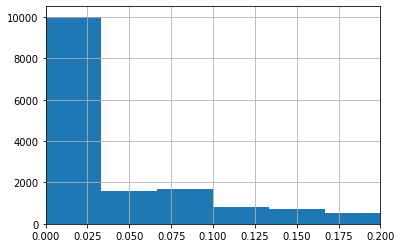

In [22]:
overlaid_gdf['weight'].hist(bins=30)
plt.xlim(0,0.2)

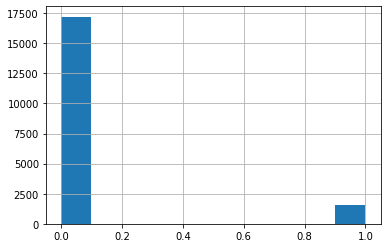

In [23]:
overlaid_gdf['truth_flag'].hist()
#overlaid_gdf.to_file('test.geojson', driver='GeoJSON')

In [24]:
final_gdf = overlaid_gdf.dropna(axis=0, subset=['truth_flag'])

In [25]:
import numpy as np
alpha_list = np.linspace(0, 1.0, 11)
roc_df = pd.DataFrame({'alpha':alpha_list})
csi_df = pd.DataFrame({'alpha':alpha_list})
pod_df = pd.DataFrame({'alpha':alpha_list})
far_df = pd.DataFrame({'alpha':alpha_list})
sunglint_angle_list = np.arange(0, 24, 4)


In [26]:
for i in sunglint_angle_list:
    roc_df['roc_' + str(i)] = np.nan
    csi_df['csi_' + str(i)] = np.nan
    pod_df['pod_' + str(i)] = np.nan
    far_df['far_' + str(i)] = np.nan

In [27]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = final_gdf[final_gdf.truth_flag==0]
df_minority = final_gdf[final_gdf.truth_flag==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_minority),     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])


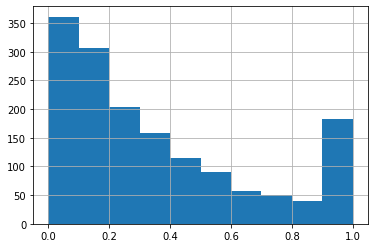

In [28]:
df_downsampled.loc[df_downsampled['truth_flag'] > 0, 'weight'].hist()

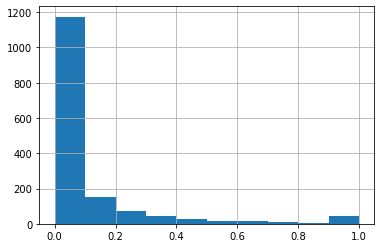

In [29]:
df_downsampled.loc[df_downsampled['truth_flag'] == 0, 'weight'].hist()

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [33]:
y = df_downsampled['truth_flag'].values
param_list = []

for alpha in alpha_list:
    for sunglint_angle in sunglint_angle_list:
        logisticRegr = LogisticRegression(fit_intercept=True, penalty='none', solver='newton-cg')
        total_weight_downsampled = ((1 - alpha) * df_downsampled['geo_weight_' + str(sunglint_angle)]) + (alpha * df_downsampled['polar_weight'])
        total_weight_downsampled = total_weight_downsampled.values.astype(float)
        x = total_weight_downsampled.reshape(-1,1)
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2)
        logisticRegr.fit(x_train, y_train)
        y_pred = logisticRegr.predict(x_test)
        y_proba_pred = logisticRegr.predict_proba(x_test)[:, 1]
        logit_roc_auc = roc_auc_score(y_test, y_proba_pred)
        fpr, tpr, thresholds = roc_curve(y_test, y_proba_pred)
        csi = 1/((1/(1-fpr)) + (1/tpr) - 1)
        param = {'csi': csi, 'tpr': tpr, 'fpr': fpr, 'proba': thresholds, 'alpha': alpha, 'sg_angle': sunglint_angle,
                 'roc': logit_roc_auc, 'model': logisticRegr, 'x': x_test, 'y': y_test}
        param_list.append(param)
        roc_df.loc[roc_df['alpha'] == alpha, 'roc_' + str(sunglint_angle)] = logit_roc_auc
        csi_df.loc[roc_df['alpha'] == alpha, 'csi_' + str(sunglint_angle)] = csi.max()
        pod_df.loc[roc_df['alpha'] == alpha, 'pod_' + str(sunglint_angle)] = tpr[csi.argmax()]
        far_df.loc[roc_df['alpha'] == alpha, 'far_' + str(sunglint_angle)] = fpr[csi.argmax()]

C:\Anaconda3\envs\fred\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
C:\Anaconda3\envs\fred\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
C:\Anaconda3\envs\fred\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
C:\Anaconda3\envs\fred\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
C:\Anaconda3\envs\fred\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
C:\Anaconda3\envs\fred\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
C:\Anaconda3\envs\fred\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
C:\Anaconda3\envs\fred\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide


In [34]:
roc_df

,alpha,roc_0,roc_4,roc_8,roc_12,roc_16,roc_20
0,0.0,0.676814,0.676814,0.676814,0.676814,0.676814,0.676814
1,0.1,0.760334,0.760334,0.760334,0.760334,0.760334,0.760334
2,0.2,0.787455,0.787455,0.787455,0.787455,0.787455,0.787455
3,0.3,0.801736,0.801736,0.801736,0.801736,0.801736,0.801736
4,0.4,0.813022,0.813022,0.813022,0.813022,0.813022,0.813022
5,0.5,0.822368,0.822368,0.822368,0.822368,0.822368,0.822368
6,0.6,0.830717,0.830717,0.830717,0.830717,0.830717,0.830717
7,0.7,0.838262,0.838262,0.838262,0.838262,0.838262,0.838262
8,0.8,0.844292,0.844292,0.844292,0.844292,0.844292,0.844292
9,0.9,0.847180,0.847180,0.847180,0.847180,0.847180,0.847180


(6.5, -0.5)

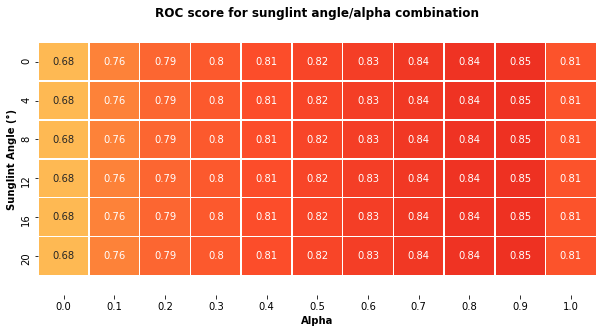

In [35]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
roc_df = roc_df.round(4)
fig = plt.figure(figsize=(10, 5))
ax = plt.axes()
y_axis_labels = [0, 4, 8, 12, 16, 20]
sns.heatmap(roc_df.set_index('alpha').transpose(), vmin=0.5, vmax=1, ax=ax, annot=True, cmap='YlOrRd', linewidths=.5, yticklabels=y_axis_labels, cbar=False)
ax.set_ylabel('Sunglint Angle (°)', fontweight="bold")
ax.set_xlabel('Alpha', fontweight="bold")
plt.title('ROC score for sunglint angle/alpha combination', size=12, fontweight="bold")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

(6.5, -0.5)

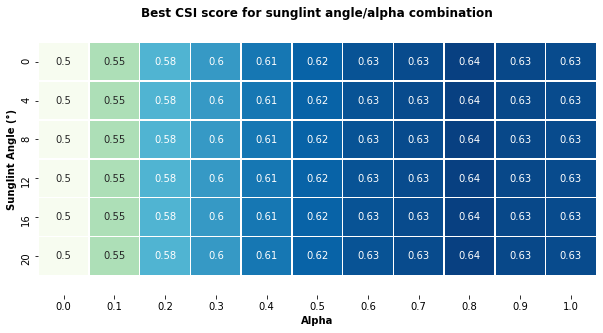

In [36]:
csi_df = csi_df.round(4)
fig = plt.figure(figsize=(10, 5))
ax = plt.axes()
y_axis_labels = [0, 4, 8, 12, 16, 20]
sns.heatmap(csi_df.set_index('alpha').transpose(), ax=ax, annot=True, cmap='GnBu', linewidths=.5, yticklabels=y_axis_labels, cbar=False)
ax.set_ylabel('Sunglint Angle (°)', fontweight="bold")
ax.set_xlabel('Alpha', fontweight="bold")
plt.title('Best CSI score for sunglint angle/alpha combination', size=12, fontweight="bold")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

(6.5, -0.5)

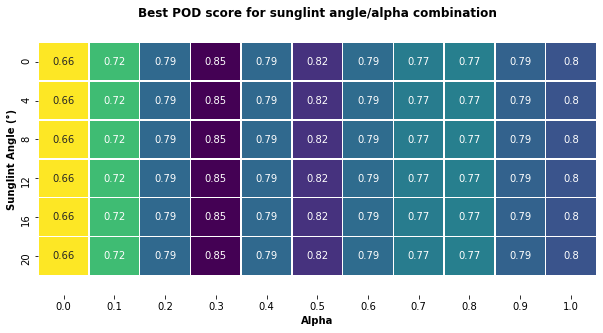

In [37]:
pod_df = pod_df.round(4)
fig = plt.figure(figsize=(10, 5))
ax = plt.axes()
y_axis_labels = [0, 4, 8, 12, 16, 20]
sns.heatmap(pod_df.set_index('alpha').transpose(), ax=ax, annot=True, cmap='viridis_r', linewidths=.5, yticklabels=y_axis_labels, cbar=False)
ax.set_ylabel('Sunglint Angle (°)', fontweight="bold")
ax.set_xlabel('Alpha', fontweight="bold")
plt.title('Best POD score for sunglint angle/alpha combination', size=12, fontweight="bold")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

(6.5, -0.5)

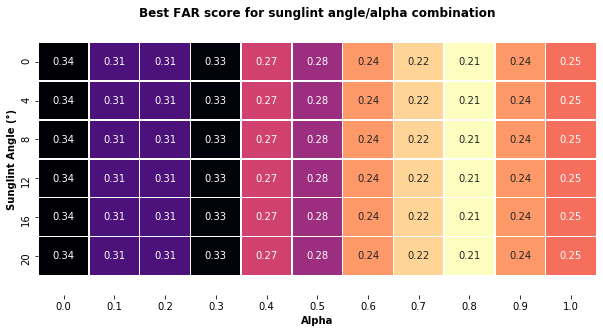

In [38]:
far_df = far_df.round(4)
fig = plt.figure(figsize=(10, 5))
ax = plt.axes()
y_axis_labels = [0, 4, 8, 12, 16, 20]
sns.heatmap(far_df.set_index('alpha').transpose(), ax=ax, annot=True, cmap='magma_r', linewidths=.5, yticklabels=y_axis_labels, cbar=False)
ax.set_ylabel('Sunglint Angle (°)', fontweight="bold")
ax.set_xlabel('Alpha', fontweight="bold")
plt.title('Best FAR score for sunglint angle/alpha combination', size=12, fontweight="bold")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [39]:
alpha_chosen = 0.7
sg_angle_chosen = 12
for i in range(0, len(param_list)):
    if (np.round(param_list[i]['alpha'], 2) == alpha_chosen) & (param_list[i]['sg_angle'] == sg_angle_chosen):
        param_chosen = param_list[i]
        break

(0.2, 1.0)

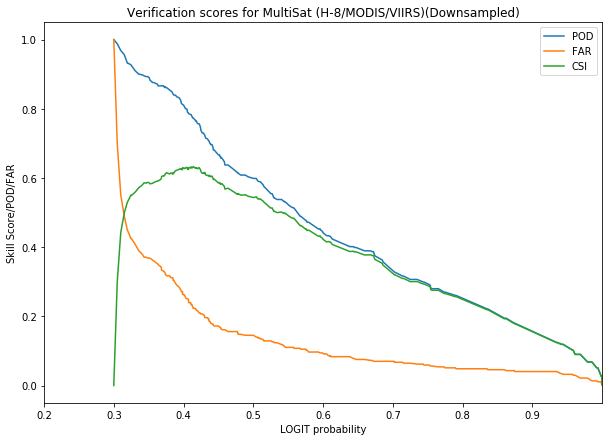

In [40]:
fig = plt.figure(figsize=(10,7))
ax = plt.axes()

ax.plot(param_chosen['proba'], param_chosen['tpr'], label='POD');
ax.plot(param_chosen['proba'], param_chosen['fpr'], label='FAR');
ax.plot(param_chosen['proba'], param_chosen['csi'], label='CSI');
ax.legend()
ax.set_xlabel('LOGIT probability')
ax.set_ylabel('Skill Score/POD/FAR')
plt.xticks(np.arange(0, 1, step=0.1))
plt.title('Verification scores for MultiSat (H-8/MODIS/VIIRS)(Downsampled)')
plt.xlim(0.2, 1.0) 

In [41]:
print (param_chosen['csi'][param_chosen['proba'] > 0.5])
print (param_chosen['tpr'][param_chosen['proba'] > 0.5])
print (param_chosen['fpr'][param_chosen['proba'] > 0.5])

[0.         0.00243309 0.02189781 0.02189652 0.0243293  0.0243277
 0.02676012 0.02675621 0.05106653 0.05105935 0.06806335 0.06802467
 0.08984656 0.08977806 0.10187257 0.10184287 0.1187495  0.11870892
 0.12112093 0.12107848 0.12348835 0.12344398 0.17869681 0.17860339
 0.19295916 0.19284962 0.21908825 0.21894625 0.25693936 0.25674298
 0.26620333 0.26599134 0.27542661 0.2751984  0.27755169 0.28225625
 0.28460752 0.28670899 0.29374437 0.29348183 0.30049817 0.30022184
 0.30954922 0.30925432 0.32087375 0.32055505 0.34830307 0.35291621
 0.36443472 0.36903639 0.37593276 0.37549285 0.37778462 0.37733779
 0.38647449 0.38600416 0.38828057 0.38732394 0.40766773 0.41443167
 0.41388132 0.41612806 0.41501    0.42170784 0.42335222 0.42557552
 0.4300189  0.43223898 0.43162606 0.44929694 0.44796261 0.45234311
 0.45165978 0.46255753 0.46183872 0.48347735 0.48268736 0.4848376
 0.48913441 0.49771346 0.49687124 0.49900572 0.49815399 0.49941864
 0.50153599 0.49979189 0.50399323 0.50310296 0.50728408 0.513545

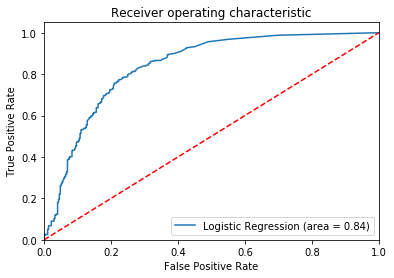

In [42]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
plt.figure()
plt.plot(param_chosen['fpr'], param_chosen['tpr'], label='Logistic Regression (area = %0.2f)' % param_chosen['roc'])
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [43]:
print (param_chosen['model'].coef_)

[[8.0257396]]


In [44]:
prob_y = param_chosen['model'].predict_proba(x)

In [45]:
prob_y[:, 1]

array([0.4787309 , 0.29994221, 0.29994221, ..., 0.4863459 , 0.43396134,
       0.68100136])

In [46]:
threshold = np.linspace(0, 1.0, 101)
threshold_prob = param_chosen['model'].predict_proba(threshold.reshape(-1,1))

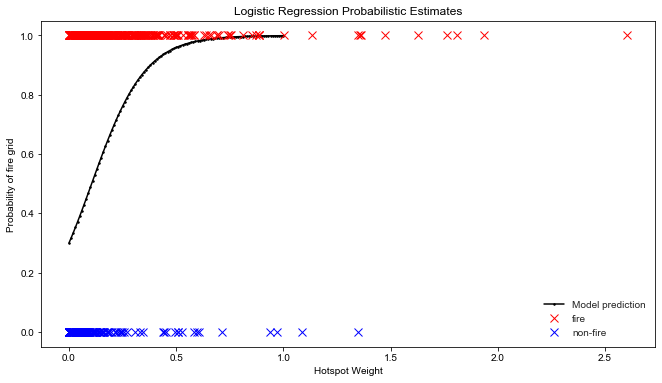

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(11,6))
ax = plt.axes()
plt.style.use('seaborn-whitegrid')
plt.xlabel('Hotspot Weight')
plt.ylabel('Probability of fire grid')
plt.title('Logistic Regression Probabilistic Estimates')
ax.plot(threshold, threshold_prob[:,1], marker='.', color='black', markersize=3, label='Model prediction');
ax.plot(param_chosen['x'][param_chosen['y']>0], param_chosen['y'][param_chosen['y']>0], 'x', color='red', markersize=8, label='fire')
ax.plot(param_chosen['x'][param_chosen['y']==0], param_chosen['y'][param_chosen['y']==0], 'x', color='blue', markersize=8, label='non-fire')
ax.legend()

In [48]:
print (threshold_prob[:,1])
print (threshold_prob[:,1] > 0.5)

[0.29994221 0.31706007 0.3346878  0.35278931 0.37132343 0.39024415
 0.40950098 0.42903944 0.4488016  0.46872676 0.48875213 0.50881366
 0.52884685 0.54878755 0.56857278 0.58814154 0.60743553 0.62639982
 0.64498341 0.66313972 0.68082698 0.69800847 0.7146527  0.73073347
 0.7462298  0.76112585 0.77541067 0.78907798 0.80212581 0.81455618
 0.82637471 0.8375902  0.8482143  0.85826101 0.86774642 0.87668826
 0.88510557 0.89301843 0.90044761 0.90741438 0.9139402  0.92004659
 0.92575489 0.93108617 0.93606107 0.94069971 0.94502159 0.94904554
 0.95278969 0.9562714  0.95950724 0.96251303 0.96530376 0.96789367
 0.9702962  0.97252405 0.97458918 0.97650285 0.97827561 0.97991738
 0.98143742 0.98284443 0.98414652 0.98535125 0.98646569 0.98749642
 0.98844957 0.98933085 0.99014556 0.99089863 0.99159464 0.99223784
 0.99283218 0.99338131 0.99388863 0.99435729 0.99479019 0.99519005
 0.99555935 0.99590041 0.99621538 0.99650624 0.99677481 0.9970228
 0.99725178 0.99746318 0.99765837 0.99783857 0.99800493 0.99815

In [119]:
print (threshold[:])
print (threshold[threshold_prob[:,1] > 0.75])

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]
[0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29 0.3  0.31 0.32 0.33
 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47
 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6  0.61
 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75
 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89
 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.  ]


In [120]:
threshold = np.linspace(0, 1.0, 100)
param_chosen['model'].predict_proba(threshold.reshape(-1,1))[:,1]

array([0.26914318, 0.2909195 , 0.31370149, 0.33741858, 0.36198302,
       0.38729047, 0.41322132, 0.43964257, 0.46641038, 0.493373  ,
       0.52037422, 0.54725694, 0.57386678, 0.60005562, 0.6256848 ,
       0.65062784, 0.67477273, 0.69802345, 0.72030095, 0.74154352,
       0.76170649, 0.78076154, 0.79869555, 0.81550918, 0.83121526,
       0.845837  , 0.85940632, 0.87196207, 0.88354847, 0.89421359,
       0.90400808, 0.91298396, 0.92119371, 0.92868938, 0.93552201,
       0.94174103, 0.94739395, 0.95252601, 0.95718004, 0.96139631,
       0.96521251, 0.96866375, 0.97178261, 0.97459919, 0.97714124,
       0.97943426, 0.98150161, 0.98336468, 0.98504296, 0.98655424,
       0.9879147 , 0.98913902, 0.99024053, 0.99123132, 0.99212232,
       0.99292343, 0.9936436 , 0.9942909 , 0.99487262, 0.99539534,
       0.99586499, 0.99628692, 0.99666594, 0.99700639, 0.99731217,
       0.99758679, 0.99783341, 0.99805488, 0.99825375, 0.99843232,
       0.99859265, 0.99873661, 0.99886586, 0.99898189, 0.99908

In [122]:
import pickle

filename = '../models/logit_reg_alpha_sep_0.7_sg_angle_12.sav'
pickle.dump(param_chosen['model'], open(filename, 'wb'))

In [123]:
loaded_model = pickle.load(open(filename, 'rb'))

In [105]:
loaded_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)